# LATAR BELAKANG
Airbnb adalah platform yang menghubungkan penyewa properti dengan tamu yang mencari akomodasi jangka pendek. Penetapan harga yang tepat sangat penting untuk menarik tamu dan memaksimalkan pendapatan bagi pemilik properti. Di Bangkok, harga sewa sangat bervariasi tergantung pada lokasi, tipe kamar, dan fasilitas yang ditawarkan. Oleh karena itu, analisis harga diperlukan untuk memahami faktor-faktor yang mempengaruhi harga sewa dan memberikan rekomendasi yang dapat meningkatkan kompetitivitas listing di pasar.

# PERNYATAAN MASALAH
Bagaimana faktor-faktor seperti lokasi, tipe kamar, dan fasilitas yang ditawarkan mempengaruhi harga sewa listing Airbnb di Bangkok, dan bagaimana rekomendasi penetapan harga yang optimal dapat membantu meningkatkan pemesanan dan pendapatan bagi pemilik properti?

# DATA
Untuk menjawab pertanyaan di atas, saya akan menganalisa data penginapan di Bangkok yang sudah disiapkan oleh perusahaan Airbnb. Dataset dapat diakses [disini](https://drive.google.com/drive/folders/1A_KBMRFTS5Mthpp46nulso679ML4ZwTF).

In [342]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

Dataset ini berisi informasi tentang listing Airbnb di Bangkok, termasuk berbagai atribut yang terkait dengan harga, lokasi, tipe kamar, dan kinerja host. Dalam dataset ini terdapat 15 kolom, yaitu:
1. id : Identifikasi unik untuk setiap listing di Airbnb.
2. name : Nama dari listing.
3. host_id : Identifikasi unik untuk setiap host di Airbnb.
4. host_name : Nama dari host, biasanya hanya nama depan.
5. neighborhood : Nama lingkungan atau area di mana listing berada.
6. latitude : Koordinat geografis lintang dari listing.
7. longitude : Koordinat geografis bujur dari listing.
8. room_type : Tipe kamar, yang bisa berupa Entire home/apt, Private room, Shared room, atau Hotel.
9. price : Harga sewa per malam dalam mata uang lokal (meskipun simbol $ mungkin digunakan).
10. minimum_nights : Jumlah malam minimum yang diizinkan untuk menginap.
11. number_of_reviews : Jumlah ulasan yang diterima oleh listing.
12. last_review : Tanggal dari ulasan terbaru.
13. calculated_host_listings_count : Jumlah listing yang dimiliki oleh host di kota/region tersebut.
14. availability_365 : Jumlah hari dalam setahun di mana listing tersedia untuk disewa.
15. number_of_reviews_ltm : Jumlah ulasan yang diterima oleh listing dalam 12 bulan terakhir.

Berikut 5 baris teratas dan terbawah dari dataset 'Airbnb Listings Bangkok'

In [343]:
df_ab = pd.read_csv('Airbnb Listings Bangkok.csv')
display(df_ab.head(), df_ab.tail())

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
15849,15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0
15853,15853,790476492384199044,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.752960,100.540820,Private room,1214,1,0,NaN,NaN,14,365,0


# DATA CLEANING
Untuk memulai analisis ini, kita perlu melakukan beberapa langkah pendahuluan, termasuk mengidentifikasi dan menangani anomali pada data. Langkah-langkah ini penting untuk memastikan bahwa data yang kita gunakan adalah akurat dan dapat diandalkan untuk analisis lebih lanjut. 

Pertama, kita akan melihat informasi dataset AIrbnb Listing Bangkok.

In [344]:
print(f'Jumlah baris dan kolom di dataset df adalah {df_ab.shape}')
df_ab.info()
df_ab.isnull().sum()

Jumlah baris dan kolom di dataset df adalah (15854, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15853 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews               15854

Unnamed: 0                           0
id                                   0
name                                 8
host_id                              0
host_name                            1
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5790
reviews_per_month                 5790
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

Kita telah membaca dataset dan memeriksa struktur datanya:

Dataset memiliki 17 kolom dan 15,854 baris.
Struktur data menunjukkan adanya beberapa kolom dengan missing values dan format data yang perlu diperiksa lebih lanjut.

Sebelum menangani missing values, kita akan menghapus kolom `unamed` karena merupakan kolom indeks yang tidak memiliki informasi yang berguna untuk keperluan analisis, menghapus kolom tidak relevan membantu menjaga dataset tetap rapi dan memudahkan analisis, serta lolom ini tidak berpengaruh pada analisis faktor-faktor yang mempengaruhi harga sewa listing Airbnb.

In [345]:
df_ab.drop(columns=['Unnamed: 0'], inplace=True)
df_ab.shape

(15854, 16)

1. DATA FORMATTING

Disini data yang perlu diformat adalah kolom `last_review`, alasannya untuk menjaga konsistensi data. Format tanggal yang konsisten sangat penting untuk analisis yang melibatkan waktu. Data yang tidak diformat dengan benar dapat menyebabkan kesalahan dalam analisis temporal atau trend analysis. Selain itu, memudahkan kita dalam pengolahan data karena jika memiliki format tanggal yang benar, kita dapat dengan mudah melakukan operasi berbasis waktu, seperti menghitung selisih hari, bulan, atau tahun antara ulasan. Data yang tidak diformat dengan benar dapat menyebabkan kesalahan parsing yang mengakibatkan kehilangan data atau data yang tidak akurat selama proses analisis.

In [346]:
# Memastikan kolom 'last_review' memiliki format tanggal yang konsisten
df_ab['last_review'] = pd.to_datetime(df_ab['last_review'], errors='coerce')

2. MISSING VALUES

Menangani missing values pada kolom `name` mengimputasi dengan nilai yang sesuai sepeti 'Unknown'. Kolom ini tidak mempengaruhi analisis harga, lokasi, atau tipe kamar secara langsung. Nama adalah informasi deskriptif yang lebih berguna untuk identifikasi visual daripada analisis kuantitatif. Meskipun begitu, disini kita mengambil keputusan mengimputasinya bukan menghapusnya karena menghindari kehilangan data lain yang mungkin penting, seperti informasi lokasi atau harga. Mengimputasi mempertahankan semua data lain yang relevan.

Kolom `name` tidak berpengaruh langsung pada analisis faktor-faktor seperti lokasi, tipe kamar, dan fasilitas yang mempengaruhi harga. Oleh karena itu, menggunakan 'Unknown' tidak akan mengganggu analisis utama. Mengimputasi nilai hilang menjaga konsistensi dataset dan memudahkan analisis lebih lanjut tanpa kehilangan data.

In [347]:
# Mengimputasi missing values pada kolom 'name' dengan 'Unknown'
df_ab['name'].fillna('Unknown', inplace=True)

Di kolom `host_name` terdapat 1 missing values, kita akan menanganinya dengan mengimputasi dengan 'Unknown Host' karena kehilangan satu baris data bisa dihindari, sehingga semua informasi lain tetap utuh dalam dataset. Kasus `host_name` sama seperti `name` yang tidak mempengaruhi analisis harga, lokasi, atau tipe kamar. Oleh karena itu, menggunakan 'Unknown Host' tidak akan mengganggu analisis utama.

In [348]:
df_ab['host_name'].fillna('Unknown Host', inplace=True)

Selanjutnya masuk ke kolom `last_review`, pada kolom ini kita akan mengimputasi karena kolom ini menunjukkan tanggal ulasan terakhir. Missing values pada kolom ini biasanya berarti bahwa listing tersebut belum menerima ulasan sama sekali.

Imputasi dengan nilai 'No Review' (atau nilai lain yang menandakan tidak ada ulasan) adalah pilihan yang baik karena mempertahankan informasi bahwa listing tersebut belum pernah diulas. Ini lebih informatif dibandingkan membiarkannya kosong atau menggunakan tanggal acak.

In [349]:
# Mengimputasi missing values pada 'last_review' dengan 'No Review'
df_ab['last_review'].fillna('No Review', inplace=True)

Pada kolom `review_per_month` kita juga akan mengimputasinya karena kolom ini menunjukkan rata-rata ulasan per bulan. Missing values di sini biasanya berarti bahwa listing tersebut tidak memiliki ulasan bulanan (mungkin karena tidak pernah diulas).

Imputasi dengan nilai '0' adalah pilihan yang baik karena menunjukkan bahwa listing tersebut tidak menerima ulasan bulanan. Ini logis dan tidak mengganggu interpretasi data.

In [350]:
# Mengimputasi missing values pada 'reviews_per_month' dengan 0
df_ab['reviews_per_month'].fillna(0, inplace=True)

In [351]:
df_ab.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

3. DATA DUPLICATE

In [352]:
df_ab.duplicated().sum()

0

Setelah kita periksa, disini tidak ada data yang terduplikasi. Namun kita akan memeriksanya lebih lanjut dengan mengabaikan kolom pertama `id` mengingat kolom tersebut (pasti nilainya unique) yang bisa saja membuatnya menjadi false positive.

In [353]:
# Melihat data duplikat dengan mengabaikan kolom pertama (ID)
df_ab[df_ab.duplicated(subset=df_ab.columns[1:], keep=False)].sort_values(list(df_ab.columns[1:]), ascending=[True]*(len(df_ab.columns)-1))

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
15829,790278230325843023,Family Room for 4 People,340188343,Rachan,Vadhana,13.740168,100.556320,Private room,2237,1,0,No Review,0.0,14,360,0
15831,790280473547745220,Family Room for 4 People,340188343,Rachan,Vadhana,13.740168,100.556320,Private room,2237,1,0,No Review,0.0,14,360,0
15549,781507744450884041,Luxury 1 Bed/Central Rama9/Jodds Fair/Phra ram9,20133201,Willam,Huai Khwang,13.756184,100.568269,Entire home/apt,2533,3,0,No Review,0.0,33,360,0
15550,781514912980696908,Luxury 1 Bed/Central Rama9/Jodds Fair/Phra ram9,20133201,Willam,Huai Khwang,13.756184,100.568269,Entire home/apt,2533,3,0,No Review,0.0,33,360,0
15614,780889390373160493,Luxury 1 Bed/Central Rama9/Jodds Fair/Phra ram9,344327171,Alice,Huai Khwang,13.757097,100.568486,Entire home/apt,2533,3,0,No Review,0.0,40,360,0
15615,780896408611028752,Luxury 1 Bed/Central Rama9/Jodds Fair/Phra ram9,344327171,Alice,Huai Khwang,13.757097,100.568486,Entire home/apt,2533,3,0,No Review,0.0,40,360,0
5890,28831409,NA BANGLAMPOO GUEST HOUSE,87704107,Yui,Phra Nakhon,13.762790,100.497900,Private room,1400,1,0,No Review,0.0,9,361,0
5976,28907857,NA BANGLAMPOO GUEST HOUSE,87704107,Yui,Phra Nakhon,13.762790,100.497900,Private room,1400,1,0,No Review,0.0,9,361,0
15183,765632824291529126,Sathon Luxury 2 br/China Town/Icon Siam,264864968,Tricia,Sathon,13.710777,100.519891,Entire home/apt,2221,1,0,No Review,0.0,44,340,0
15186,765691389894680033,Sathon Luxury 2 br/China Town/Icon Siam,264864968,Tricia,Sathon,13.710777,100.519891,Entire home/apt,2221,1,0,No Review,0.0,44,340,0


Ternyata benar saja, setelah kita melihat duplikat dengan kolom id sebagai pengecualian ternyata terdapat 14 baris data duplikat, maka kita akan drop duplicatenya.

In [354]:
df_ab.drop_duplicates(subset=df_ab.columns[1:], keep='first', inplace=True)

df_ab.duplicated(subset=df_ab.columns[1:], keep=False).value_counts()

False    15847
Name: count, dtype: int64

Setelah drop data duplicate, sekarang data yang kita punya adalah 15,847 baris.

4. OUTLIERS

Yang pertama kita lakukan adalah mengidentifikasi menggunakan IQR pada kolom `price` dan `number_of_review`. Alasan mengindentifikasi kolom `price` (Harga) karena variabel utama yang dianalisis untuk memahami faktor-faktor yang mempengaruhinya. Outliers dalam harga dapat secara signifikan mempengaruhi rata-rata harga dan interpretasi analisis. Harga yang sangat tinggi atau sangat rendah mungkin mencerminkan kesalahan input data atau listing yang sangat tidak biasa (misalnya, properti mewah yang sangat mahal atau properti yang sangat murah dengan kondisi yang tidak layak).

Lalu, kolom `number_of_reviews` (Jumlah Ulasan) karena jumlah ulasan adalah indikator kinerja dan popularitas listing. Outliers dalam jumlah ulasan dapat mempengaruhi interpretasi popularitas listing. Listing dengan jumlah ulasan yang sangat tinggi atau sangat rendah bisa mencerminkan anomali (misalnya, listing yang sangat populer dengan banyak ulasan atau listing baru tanpa ulasan).

Pertama, mari kita lihat data outliers menggunakan box plot dan scatter plot terlebih dahulu. Dimana box plot memudahkan identifikasi outliers dalam kolom `price` dan `number_of_reviews`. Sedangkan scatter plot untuk menunjukkan distribusi data dan membantu mengidentifikasi outliers secara visual.

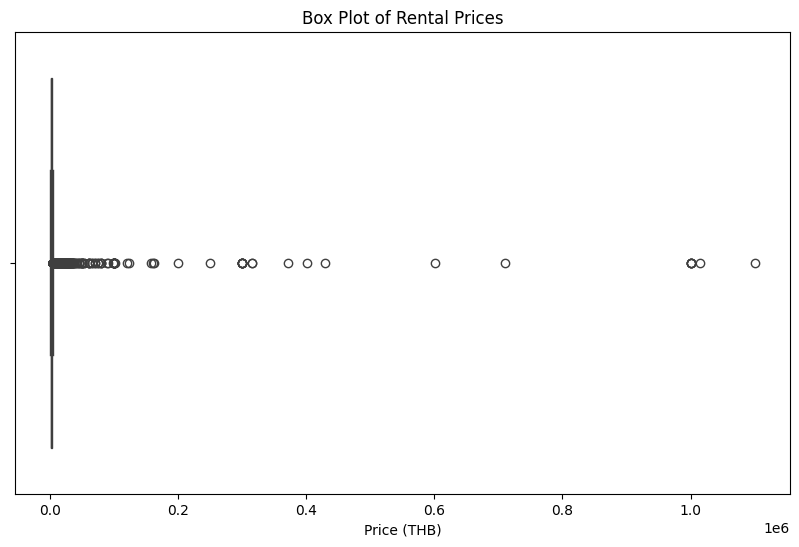

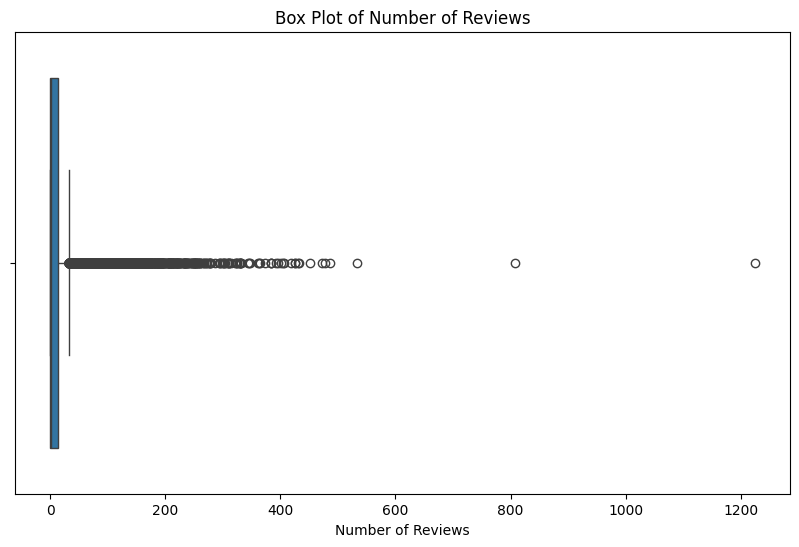

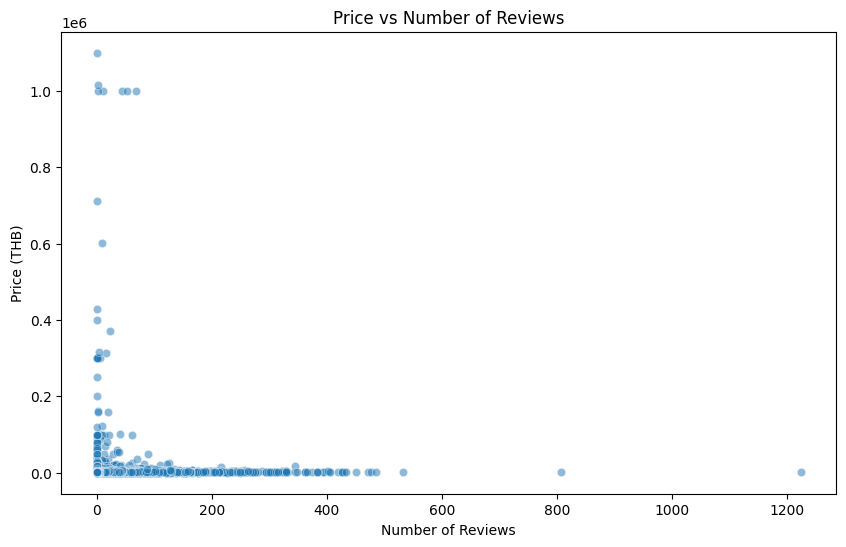

In [355]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_ab['price'])
plt.title('Box Plot of Rental Prices')
plt.xlabel('Price (THB)')
plt.show()

# Box plot untuk kolom 'number_of_reviews'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_ab['number_of_reviews'])
plt.title('Box Plot of Number of Reviews')
plt.xlabel('Number of Reviews')
plt.show()

# Scatter plot untuk kolom 'price' dan 'number_of_reviews'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_ab['number_of_reviews'], y=df_ab['price'], alpha=0.5)
plt.title('Price vs Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Price (THB)')
plt.show()

In [356]:
# Mengidentifikasi outliers menggunakan IQR untuk kolom 'price'
Q1_price = df_ab['price'].quantile(0.25)
Q3_price = df_ab['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

# Mengidentifikasi outliers menggunakan IQR untuk kolom 'number_of_reviews'
Q1_reviews = df_ab['number_of_reviews'].quantile(0.25)
Q3_reviews = df_ab['number_of_reviews'].quantile(0.75)
IQR_reviews = Q3_reviews - Q1_reviews
lower_bound_reviews = Q1_reviews - 1.5 * IQR_reviews
upper_bound_reviews = Q3_reviews + 1.5 * IQR_reviews

Setelah kita mengidentifikasi outiers, kita akan menghapus outliers tersebut karena untuk mengurangi bias, outliers dapat mempengaruhi hasil analisis statistik dan model prediktif. Selain itu, menghapus nilai ekstrem memungkinkan kita untuk bekerja dengan dataset yang lebih bersih dan representatif.

In [357]:
# Menghapus outliers pada kolom 'price'
df_ab_cleaned = df_ab[~((df_ab['price'] < lower_bound_price) | (df_ab['price'] > upper_bound_price))]

# Menghapus outliers pada kolom 'number_of_reviews'
df_ab_cleaned = df_ab_cleaned[~((df_ab_cleaned['number_of_reviews'] < lower_bound_reviews) | (df_ab_cleaned['number_of_reviews'] > upper_bound_reviews))]

Setelah kita menghapus data outliers, mari kita periksa kembali menggunakan visualisasi untuk memastikan data sudah terdistribusi normal.

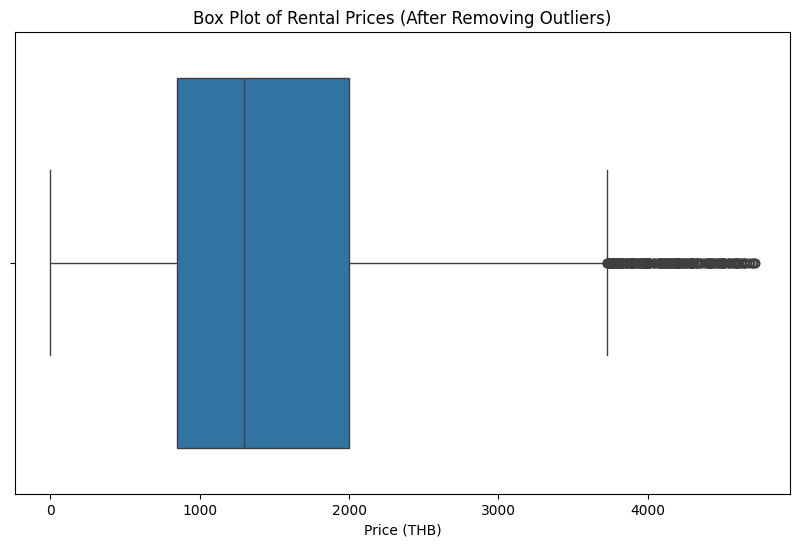

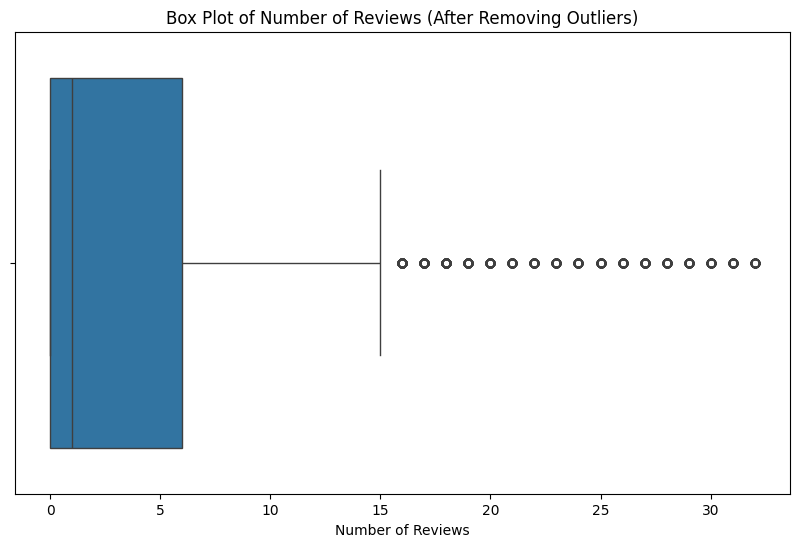

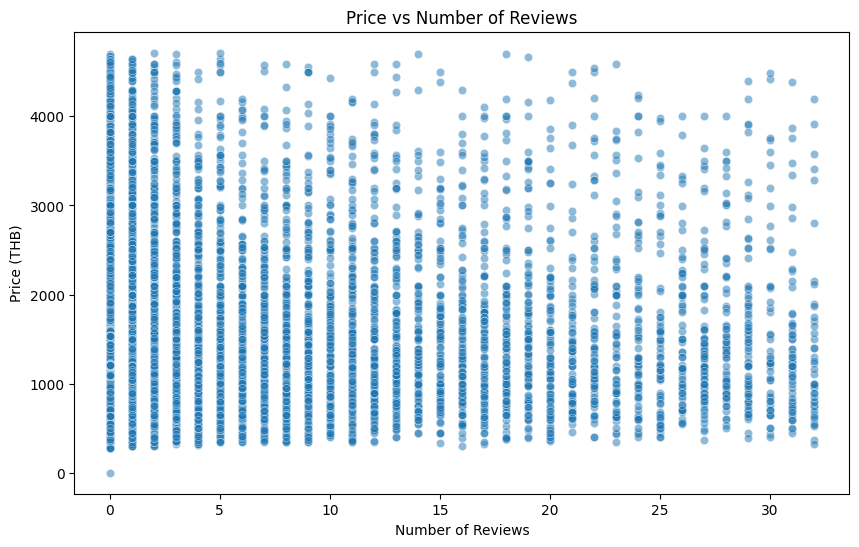

In [358]:
# Box plot untuk kolom 'price' setelah menghapus outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_ab_cleaned['price'])
plt.title('Box Plot of Rental Prices (After Removing Outliers)')
plt.xlabel('Price (THB)')
plt.show()

# Box plot untuk kolom 'number_of_reviews' setelah menghapus outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_ab_cleaned['number_of_reviews'])
plt.title('Box Plot of Number of Reviews (After Removing Outliers)')
plt.xlabel('Number of Reviews')
plt.show()

# Scatter plot untuk kolom 'price' dan 'number_of_reviews'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_ab_cleaned['number_of_reviews'], y=df_ab['price'], alpha=0.5)
plt.title('Price vs Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Price (THB)')
plt.show()

Dilihat dari atas, sekarang data yang tersedia sudah terdistribusi normal, dan untuk anomali lainnya sudah teratasi sehingga kita bisa masuk ke tahap selanjutnya yaitu Data Analisis.

# DATA ANALISIS

Untuk melakukan analisis data mengenai bagaimana faktor-faktor seperti lokasi, tipe kamar, dan fasilitas yang ditawarkan mempengaruhi harga sewa listing Airbnb di Bangkok serta memberikan rekomendasi penetapan harga yang optimal, langkah pertama kita akan memuat dataset yang sudah dibersihkan untuk memeriksa isi serta struktur data.

In [359]:
df_ab_cleaned.info()
df_ab_cleaned.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 12364 entries, 1 to 15853
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              12364 non-null  int64  
 1   name                            12364 non-null  object 
 2   host_id                         12364 non-null  int64  
 3   host_name                       12364 non-null  object 
 4   neighbourhood                   12364 non-null  object 
 5   latitude                        12364 non-null  float64
 6   longitude                       12364 non-null  float64
 7   room_type                       12364 non-null  object 
 8   price                           12364 non-null  int64  
 9   minimum_nights                  12364 non-null  int64  
 10  number_of_reviews               12364 non-null  int64  
 11  last_review                     12364 non-null  object 
 12  reviews_per_month               12364

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.236400e+04,1.236400e+04,12364.000000,12364.000000,12364.000000,12364.000000,12364.000000,12364.000000,12364.000000,12364.000000,12364.000000
mean,1.825099e+17,1.643699e+08,13.746025,100.560815,1552.993853,15.971368,4.718538,0.354224,13.444678,247.955435,1.887658
std,3.099591e+17,1.340098e+08,0.044900,0.053353,942.341474,49.569962,7.403817,0.784707,29.932109,125.791537,4.154609
min,2.797900e+04,7.041300e+04,13.527300,100.329550,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,2.324891e+07,4.534856e+07,13.718547,100.528137,850.000000,1.000000,0.000000,0.000000,1.000000,146.000000,0.000000
50%,3.797951e+07,1.355110e+08,13.739270,100.562910,1299.000000,1.000000,1.000000,0.040000,4.000000,319.000000,0.000000
75%,5.698166e+17,2.573496e+08,13.761440,100.588043,2000.000000,10.000000,6.000000,0.340000,12.000000,362.000000,2.000000
max,7.907510e+17,4.926659e+08,13.949610,100.923440,4714.000000,1115.000000,32.000000,16.000000,228.000000,365.000000,32.000000


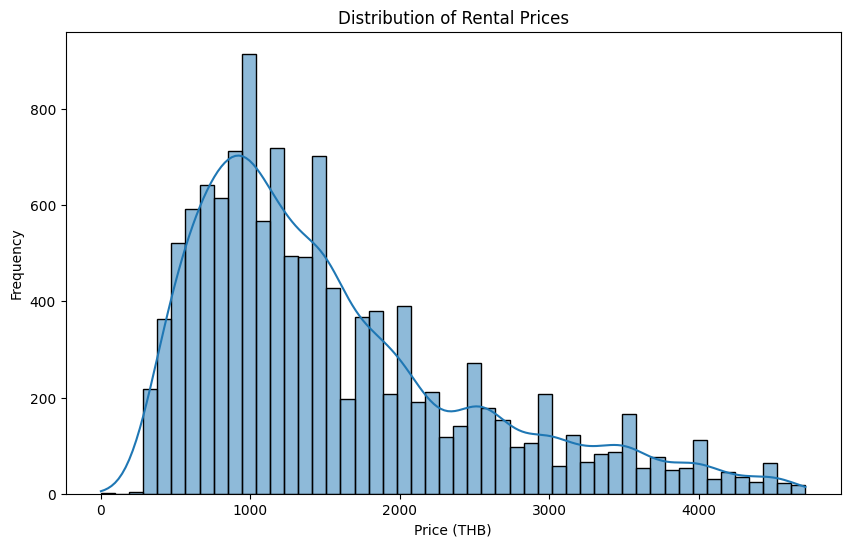

In [360]:
# Statistika Deskriptif
# Plot distribusi harga sewa
plt.figure(figsize=(10, 6))
sns.histplot(df_ab_cleaned['price'], bins=50, kde=True)
plt.title('Distribution of Rental Prices')
plt.xlabel('Price (THB)')
plt.ylabel('Frequency')
plt.show()

INSIGHT

Histogram menunjukkan distribusi harga sewa listing Airbnb di Bangkok. Data ini memberikan gambaran mengenai bagaimana harga sewa tersebar, apakah data cenderung memiliki distribusi normal atau tidak. Histogram ini menunjukkan distribusi yang miring ke kanan (positif skewness), berarti mayoritas harga sewa berada di kisaran yang lebih rendah, dengan beberapa listing yang memiliki harga sangat tinggi.
Adanya harga sewa yang jauh lebih tinggi dibandingkan mayoritas menunjukkan adanya listing mewah.

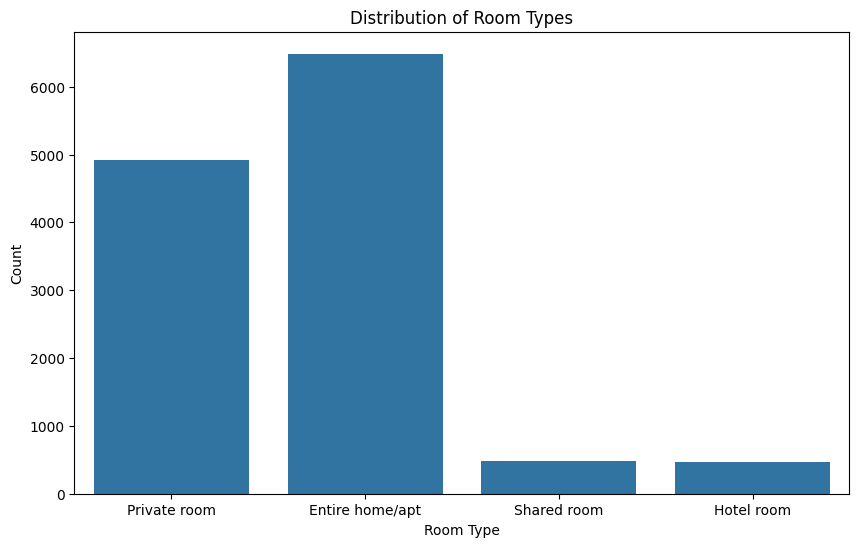

In [361]:
# Plot distribusi tipe kamar
plt.figure(figsize=(10, 6))
sns.countplot(data=df_ab_cleaned, x='room_type')
plt.title('Distribution of Room Types')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()

INSIGHT

Listing berdasarkan tipe kamar :
- Entire home/apt: Jumlah listing di mana seluruh unit properti disewakan.
- Private room: Jumlah listing di mana tamu menyewa kamar pribadi tetapi berbagi ruang bersama.
- Shared room: Jumlah listing di mana tamu menyewa tempat tidur di ruang yang dibagikan dengan tamu lain.
- Hotel: Jumlah listing yang merupakan kamar di hotel. Ini bisa berupa kamar yang disewakan oleh hotel melalui platform Airbnb, sering kali dengan fasilitas dan layanan hotel standar. (Untuk hotel karena tidak ada penjelasan di AirBnb Listing Bangkok Dictionary, maka informasi yang dicantumkan didapat dari website AirBnb itu sendiri).
('https://airbnb.co.id/resources/hosting-homes/a/how-to-define-what-kind-of-space-youre-hosting-361')

Grafik distribusi ini membantu kita memahami proporsi dari setiap tipe kamar yang tersedia di pasar Airbnb Bangkok.

Dominasi untuk "Entire home/apt" menunjukkan bahwa ada permintaan yang cukup besar untuk unit yang menawarkan lebih banyak privasi dan eksklusivitas serta fasilitas tambahan seperti dapur.

Proporsi yang signifikan dari "Private room" menunjukkan preferensi pasar untuk kamar pribadi yang menawarkan keseimbangan antara privasi dan biaya.

Sebagian kecil dari pasar adalah "Shared room" dan "Hotel" menunjukkan bahwa ada pasar yang lebih kecil. Meskipun "Shared room" merupakan akomodasi yang sangat hemat biaya dan berbagi ruang dengan orang lain .

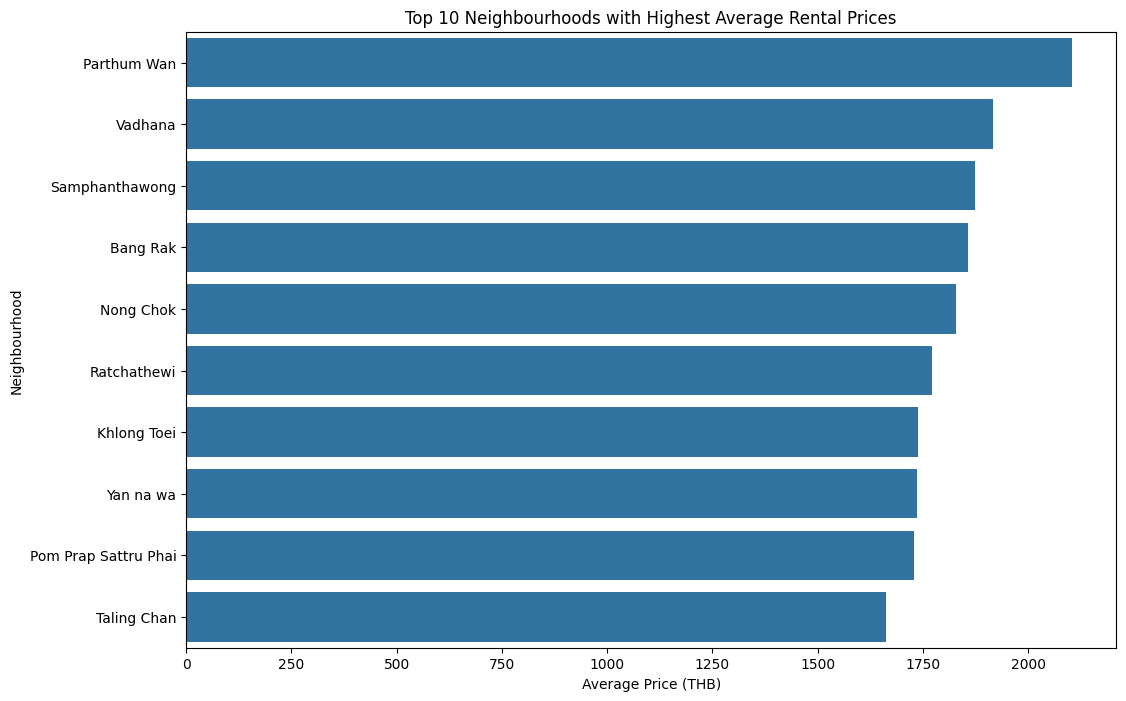

In [362]:
# Plot harga sewa berdasarkan lokasi
plt.figure(figsize=(12, 8))
avg_price_neighbourhood = df_ab_cleaned.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=avg_price_neighbourhood.values, y=avg_price_neighbourhood.index)
plt.title('Top 10 Neighbourhoods with Highest Average Rental Prices')
plt.xlabel('Average Price (THB)')
plt.ylabel('Neighbourhood')
plt.show()

INSIGHT

Grafik ini menunjukkan kawasan mana yang memiliki harga sewa rata-rata tertinggi. Ini bisa menunjukkan kawasan yang paling premium atau paling populer di Bangkok untuk listing Airbnb. Kawasan dengan harga sewa rata-rata yang tinggi mungkin memiliki permintaan yang tinggi, baik karena lokasi yang strategis, fasilitas yang tersedia, atau reputasi kawasan tersebut. Contoh, kawasan yang dekat dengan pusat bisnis, atraksi turis, atau kawasan hiburan mungkin memiliki harga sewa yang lebih tinggi karena permintaan yang tinggi dari turis dan pelancong bisnis.

Parthum Wan memiliki harga sewa rata-rata tertinggi ini menunjukkan bahwa Parthum Wan adalah kawasan yang paling premium untuk Airbnb di Bangkok. Pemilik properti di Parthum Wan dapat menetapkan harga yang tinggi karena lokasi yang strategis dan fasilitas yang mungkin lebih mewah.

Source : (https://www.tripadvisor.com/Attractions-g293916-Activities-zfn15620307-Bangkok.html)

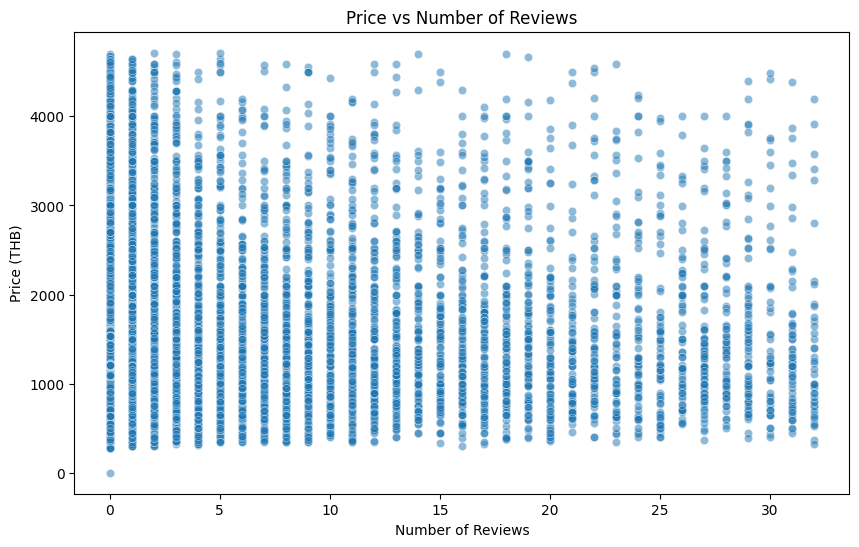

In [363]:
# Visualisasi Pengaruh Review terhadap Harga
# Scatter plot untuk hubungan antara jumlah ulasan dan harga
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_ab_cleaned['number_of_reviews'], y=df_ab_cleaned['price'], alpha=0.5)
plt.title('Price vs Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Price (THB)')
plt.show()

INSIGHT

Setiap titik dalam scatter plot mewakili satu listing, dengan sumbu horizontal (x-axis) menunjukkan jumlah ulasan dan sumbu vertikal (y-axis) menunjukkan harga sewa. Dari grafik ini kita dapat lihat jika titik-titik data cenderung membentuk pola turun dari kiri atas ke kanan bawah, ini menunjukkan bahwa listing dengan harga sewa yang lebih rendah cenderung mendapatkan lebih banyak ulasan. Ini bisa menunjukkan bahwa ada permintaan tinggi untuk opsi akomodasi yang lebih terjangkau.

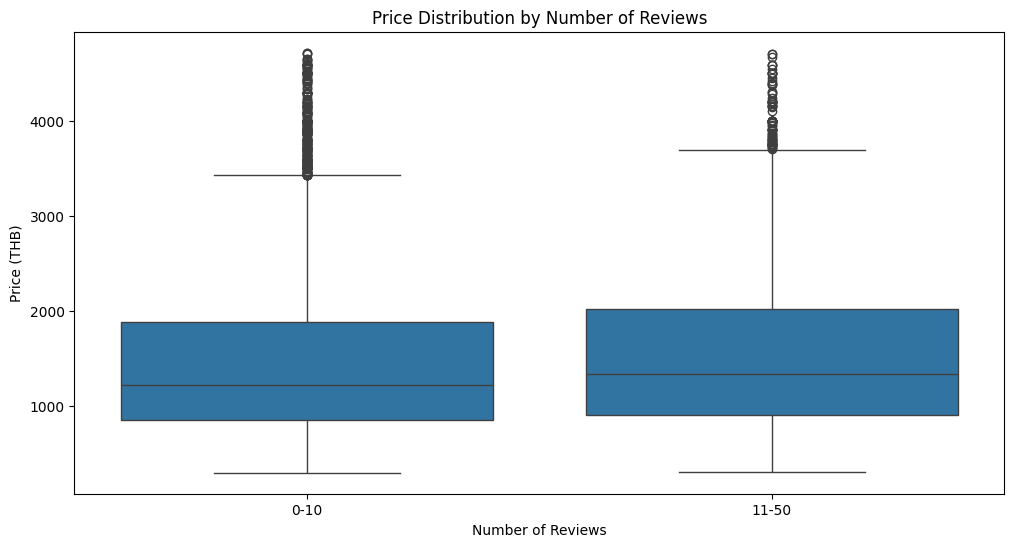

In [364]:
# Box plot untuk distribusi harga berdasarkan jumlah ulasan
plt.figure(figsize=(12, 6))
sns.boxplot(x=pd.cut(df_ab_cleaned['number_of_reviews'], bins=[0, 10, 50], labels=['0-10', '11-50']), y=df_ab_cleaned['price'])
plt.title('Price Distribution by Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Price (THB)')
plt.show()

INSIGHT

Pemilik properti dengan sedikit ulasan mungkin perlu bereksperimen dengan harga yang lebih fleksibel untuk menemukan titik harga yang menarik tamu.
Harga yang terlalu rendah mungkin menarik tamu, tetapi harga yang terlalu tinggi bisa menurunkan jumlah pemesanan sehingga tidak akan diulas. Properti dengan jumlah ulasan yang tinggi "11-50" menunjukkan stabilitas harga dan popularitas. Pemilik properti ini bisa menetapkan harga yang lebih tinggi dengan keyakinan bahwa mereka tetap akan mendapatkan pemesanan.

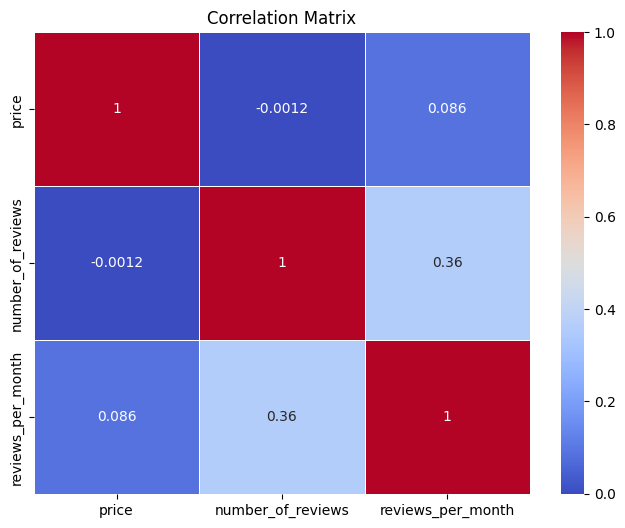

In [365]:
# Heatmap untuk korelasi antara jumlah ulasan dan harga
plt.figure(figsize=(8, 6))
correlation = df_ab_cleaned[['price', 'number_of_reviews', 'reviews_per_month']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Dari grafik diatas menunjukan bahwa cenderung tidak adanya korelasi antara `number_of_review` dan `review_per_month` terhadap harga.

In [366]:
from scipy import stats

# ANOVA untuk melihat perbedaan harga berdasarkan tipe kamar
anova_result = stats.f_oneway(df_ab_cleaned[df_ab_cleaned['room_type'] == 'Entire home/apt']['price'],
                              df_ab_cleaned[df_ab_cleaned['room_type'] == 'Private room']['price'],
                              df_ab_cleaned[df_ab_cleaned['room_type'] == 'Shared room']['price'])

print('ANOVA result:', anova_result)
stats, pval = anova_result
if pval<=0.05:
    print('Tolak Ho')
else:
    print('Gagal menolak Ho')



ANOVA result: F_onewayResult(statistic=360.05267450268195, pvalue=1.526631532678652e-152)
Tolak Ho


INSIGHT

Uji hipotesis dengan ANOVA sudah mencakup perbandingan antara lebih dari dua grup (dalam hal ini tipe kamar).
Untuk menjelaskan hasil uji ANOVA, kita perlu mendefinisikan hipotesis nol (Ho) dan hipotesis alternatif (Ha) terlebih dahulu, serta interpretasi hasil uji tersebut.

Hipotesis
Ho (Hipotesis Nol): Tidak ada perbedaan signifikan dalam harga sewa berdasarkan tipe kamar.
Ha (Hipotesis Alternatif): Ada setidaknya satu perbedaan signifikan dalam harga sewa berdasarkan tipe kamar.

Dengan menolak hipotesis nol, kita mendukung hipotesis alternatif. Ini berarti bahwa tipe kamar (Entire home/apt, Private room, Shared room, Hotel) memiliki harga sewa yang secara signifikan berbeda satu sama lain.

# Rekomendasi Penetapan Harga yang Optimal
Berdasarkan hasil analisis, berikut adalah rekomendasi yang dapat membantu meningkatkan pemesanan dan pendapatan bagi pemilik properti Airbnb di Bangkok:

- Penetapan Harga Berdasarkan Tipe Kamar:

Entire home/apt: Pemilik properti dapat menetapkan harga yang lebih tinggi, terutama jika properti mereka memiliki fasilitas tambahan seperti kolam renang, gym, atau pemandangan indah. Properti ini bisa dipasarkan ke segmen premium yang mencari kenyamanan dan privasi.

Private room: Penetapan harga harus mempertimbangkan keseimbangan antara kenyamanan dan biaya. Harga dapat sedikit lebih rendah daripada "Entire home/apt", tetapi tetap kompetitif dengan properti serupa di kawasan yang sama.

Shared room: Harga sewa harus sangat kompetitif untuk menarik traveler dengan anggaran terbatas, seperti backpacker atau pelancong muda. Menawarkan fasilitas tambahan seperti Wi-Fi gratis atau sarapan sederhana dapat menjadi nilai tambah.

Hotel: Manajemen hotel dapat meningkatkan layanan dan fasilitas yang didapatkan.


- Penetapan Harga Berdasarkan Lokasi:

Kawasan Premium: Listing di kawasan ini dapat menetapkan harga sewa yang lebih tinggi karena lokasi yang strategis dan permintaan yang tinggi.

Kawasan Menengah: Harga sewa harus disesuaikan dengan harga pasar dan fasilitas yang ditawarkan. Menonjolkan keunggulan lokasi seperti kedekatan dengan transportasi umum atau atraksi wisata bisa membantu.

Kawasan Pinggiran: Menawarkan harga yang lebih rendah untuk menarik lebih banyak pemesan, terutama traveler yang mencari akomodasi yang lebih tenang atau dekat dengan alam.

- Strategi Pemasaran Berdasarkan Ulasan:

Ulasan Positif: Listing dengan banyak ulasan positif bisa memanfaatkan ulasan tersebut dalam strategi pemasaran untuk menarik lebih banyak pemesan dan menetapkan harga sewa yang lebih tinggi.

Ulasan Negatif: Mengatasi keluhan dalam ulasan negatif dan meningkatkan kualitas layanan serta fasilitas dapat membantu meningkatkan rating dan memungkinkan peningkatan harga sewa di masa depan.

- Peningkatan Fasilitas untuk Meningkatkan Harga:

Menambahkan fasilitas yang banyak diminati, seperti Wi-Fi cepat, AC, peralatan dapur lengkap, atau transportasi bandara gratis, dapat meningkatkan harga sewa dan daya tarik listing.

Investasi dalam dekorasi yang menarik dan modern serta memberikan pengalaman unik seperti tur lokal atau pengalaman budaya dapat memberikan nilai tambah yang memungkinkan harga sewa yang lebih tinggi.

- Promosi dan Diskon:

Menawarkan diskon untuk pemesanan jangka panjang atau pemesanan awal bisa menarik lebih banyak tamu dan meningkatkan okupansi.
Melakukan promosi musiman atau penawaran khusus pada waktu-waktu tertentu bisa membantu meningkatkan pemesanan selama periode low season.

In [367]:
df_ab_cleaned.to_csv('Airbnb Listings Bangkok (Cleaned).csv', index=False)